In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# dataset real: https://openreview.net/forum?id=QVeMBoRXAo_
# https://zenodo.org/records/5166987
# Cropped to the size 768x768, not resized
# Link: https://drive.google.com/drive/folders/1e08JqlfoxWK1_uiyqGPLadsfsaKP5Jbd?usp=share_link

# fake dataset: Stable diffusion 2, prompt : "churches from outside", size 768x768
# Link: https://drive.google.com/drive/folders/1d6TWa5hL2SKjSQszODCR6uBS_6de1H-7?usp=share_link


In [4]:
# The results for the datasets above, using code : https://github.com/rezashkv/gen-image-detector/blob/main/gradient/detect_local.py
# results in file: https://drive.google.com/drive/folders/1gixVo1UuTFEtogRy6WIJgZO3TMBje9yD?usp=share_link

path_1 = '/content/drive/MyDrive/CMSC673/Final_presentation/Data/result_gradient_churches_768'

results_dataset = []
for name in os.listdir(path_1):
  results_dataset.append(name)

In [5]:
i = 0
for i, file_csv in enumerate(results_dataset):
  df1 = pd.read_csv(path_1 + '/' + file_csv)
  new_col_name = file_csv[5:10] + file_csv[12:-4]
  df1 = df1.rename(columns={"errors": new_col_name})
  if i == 0:
    df = df1
  else:
    df = df1.join(df)

In [6]:
df

,fake_50,real_50,real_40,real_30,real_10,real_20,real_100,real_75,fake_10,fake_20,...,fake_100,fake_75,fake_400,real_800,real_400,real_600,real_200,fake_600,fake_800,fake_200
0,0.000908,0.002024,0.001440,0.001055,0.000717,0.000975,0.005784,0.003149,0.000393,0.000442,...,0.001611,0.001434,0.062129,2.005196,0.281309,0.716467,0.052164,0.512212,1.325419,0.012739
1,0.004481,0.003529,0.003025,0.002240,0.001399,0.001704,0.007056,0.005429,0.001418,0.002030,...,0.012109,0.008386,0.016842,0.503341,0.037434,0.112399,0.021882,0.091042,1.806351,0.006524
2,0.000957,0.000835,0.000779,0.000519,0.000430,0.000522,0.002556,0.001533,0.000440,0.000608,...,0.001928,0.001411,0.178845,3.800793,0.035301,0.414747,0.007610,0.175726,0.350020,0.076495
3,0.001080,0.001815,0.001443,0.001187,0.000658,0.000780,0.003224,0.003602,0.000502,0.000643,...,0.002761,0.001954,0.086454,1.489477,0.082212,0.611356,0.011234,0.309721,1.724687,0.025221
4,0.001521,0.003146,0.002378,0.002020,0.001161,0.001565,0.007643,0.005227,0.000519,0.000472,...,0.003728,0.002592,0.134939,1.166616,0.086011,0.437314,0.012963,0.274887,1.099855,0.022209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002547,0.002832,0.002356,0.001437,0.000910,0.001398,0.005736,0.003996,0.000784,0.001146,...,0.004586,0.004127,0.183492,2.692468,0.061005,0.923880,0.008308,0.351547,1.882155,0.065862
96,0.001003,0.002369,0.001903,0.001585,0.000532,0.000790,0.005778,0.004822,0.000442,0.000554,...,0.002253,0.001490,0.103288,6.720449,0.100781,1.420989,0.016947,0.721452,5.136361,0.013322
97,0.001484,0.002999,0.002237,0.001676,0.000738,0.001101,0.009502,0.006402,0.000454,0.000601,...,0.003501,0.002714,0.041591,3.112461,0.103452,0.460416,0.022531,0.336454,1.647297,0.007601
98,0.004246,0.001581,0.001568,0.001110,0.000422,0.000712,0.004242,0.003588,0.001110,0.001445,...,0.009321,0.006138,0.123092,0.722545,0.039998,0.163474,0.008144,0.517059,0.968891,0.035336


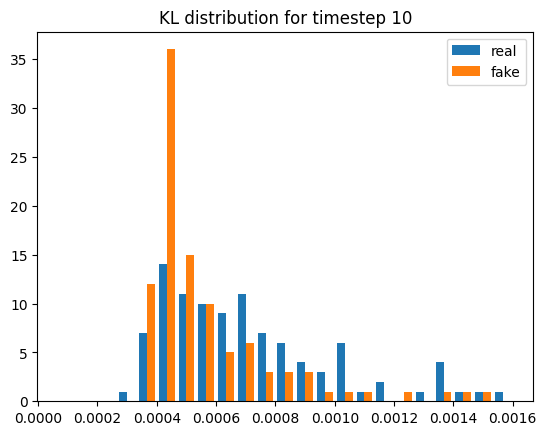

In [7]:
bins = [float(i) / 15000 for i in range(1, 25)]

plt.hist([df['real_10'], df['fake_10']], bins = bins)
plt.title("KL distribution for timestep 10")
plt.legend(['real', 'fake'])
plt.show()

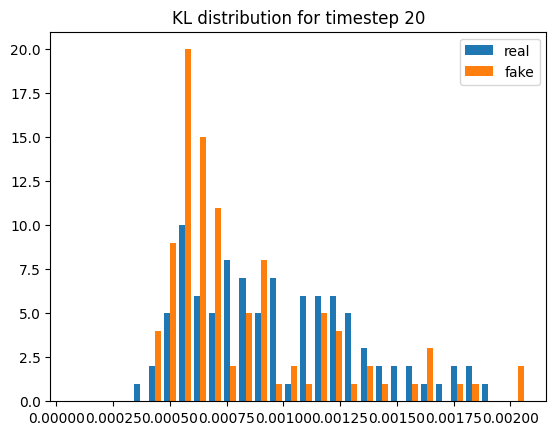

In [8]:
bins = [float(i) / 15000 for i in range(1, 32)]

plt.hist([df['real_20'], df['fake_20']], bins = bins)
plt.title("KL distribution for timestep 20")
plt.legend(['real', 'fake'])
plt.show()

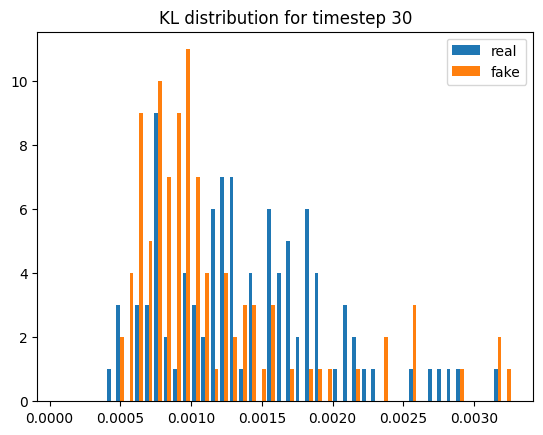

In [9]:
bins = [float(i) / 15000 for i in range(1, 50)]

plt.hist([df['real_30'], df['fake_30']], bins = bins)
plt.title("KL distribution for timestep 30")
plt.legend(['real', 'fake'])
plt.show()

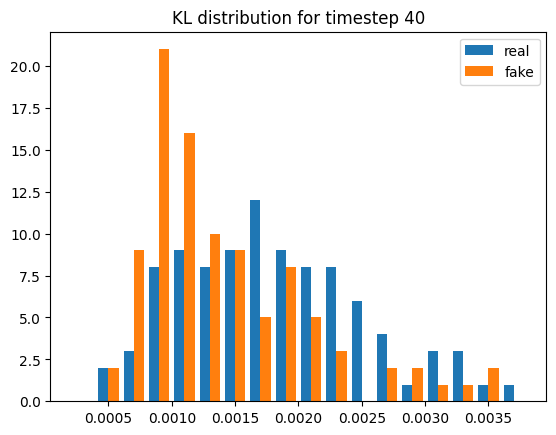

In [10]:
bins = [float(i) / 5000 for i in range(1, 20)]

plt.hist([df['real_40'], df['fake_40']], bins = bins)

plt.title("KL distribution for timestep 40")
plt.legend(['real', 'fake'])
plt.show()

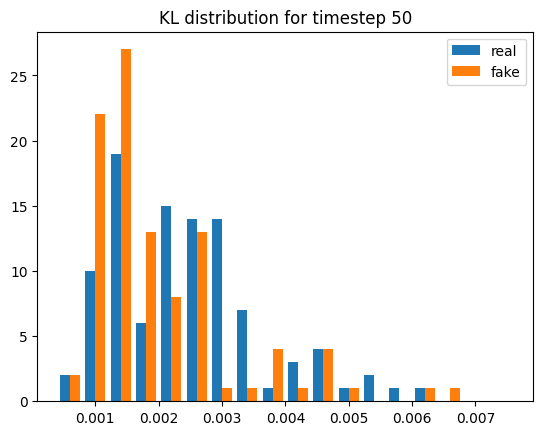

In [11]:
bins = [float(i) / 2500 for i in range(1, 20)]

plt.hist([df['real_50'], df['fake_50']], bins = bins )

plt.legend(['real', 'fake'])
plt.title("KL distribution for timestep 50")
plt.show()

In [12]:
def roc_graph(number_1,  df):
  #roc
  errors_fake = list(df[f'fake_{number_1}'] )
  errors_real =  list(df[f'real_{number_1}'])
  preds =  errors_fake + errors_real
  preds = [1 - pred for pred in preds]

  t_labels = [1] * len(errors_fake) + [0] * len(errors_real)

  fpr, tpr, thresholds = metrics.roc_curve(t_labels, preds)
  auc = metrics.auc(fpr, tpr)
  acc = np.max(1 - (fpr + (1 - tpr))/2)
  roc_auc = metrics.auc(fpr, tpr)

  err = .01
  low = tpr[np.where(fpr<.01)[0][-1]]

  print(low)
  # method I: plt
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.02f' % roc_auc)
  plt.plot(low, err, 'b', label = 'FPR@TPR < 0.01 = %0.02f' % low)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

10
0.0


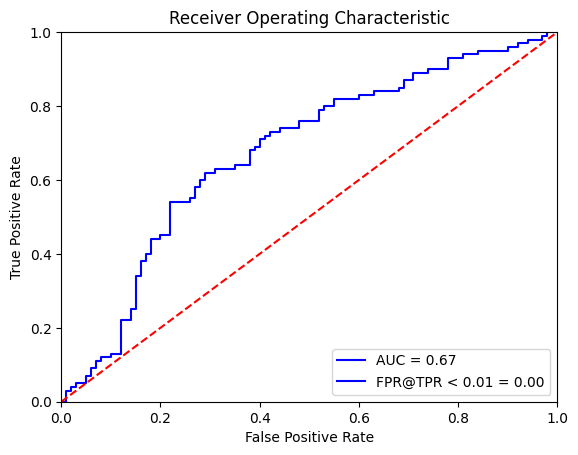

20
0.0


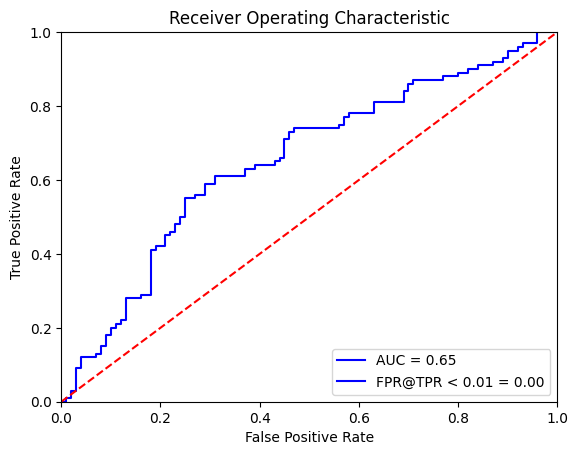

30
0.0


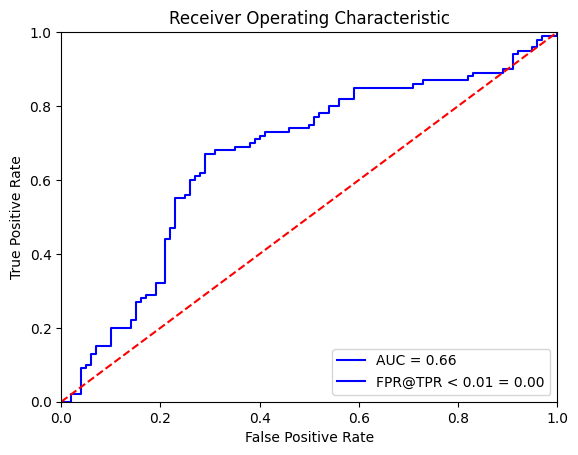

50
0.0


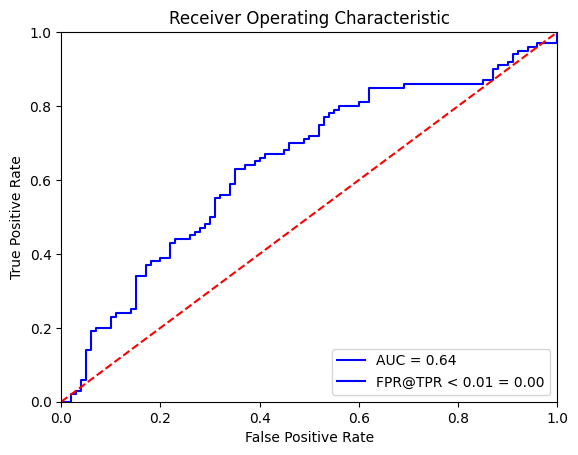

75
0.0


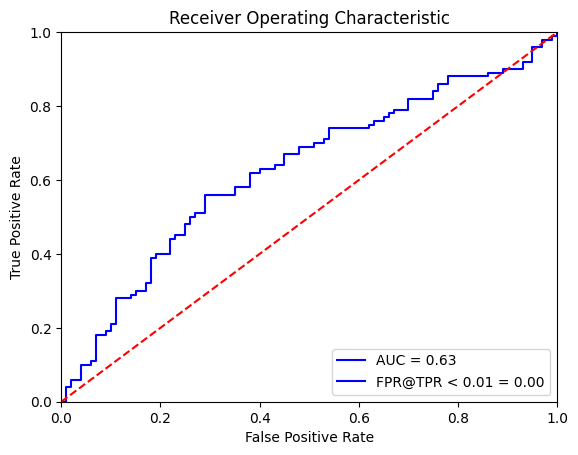

100
0.0


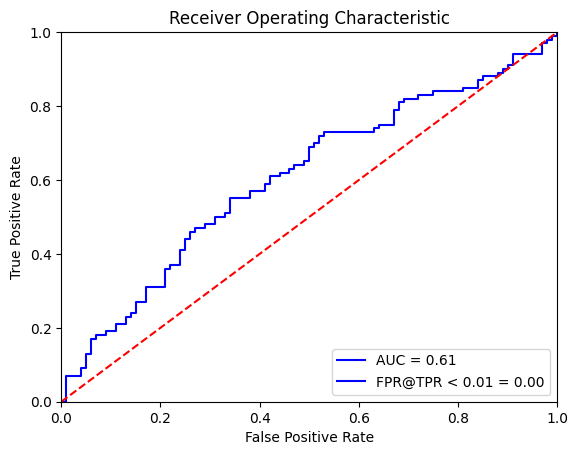

200
0.0


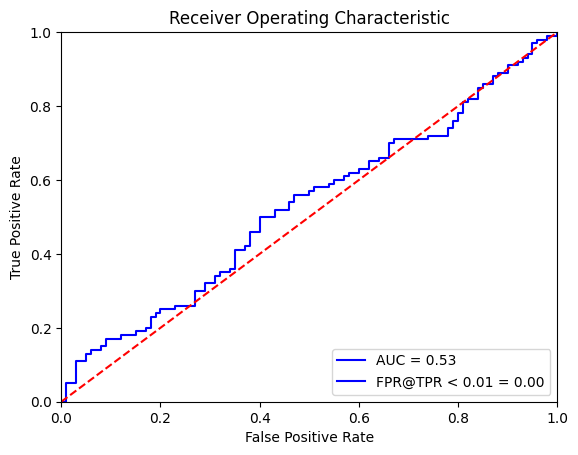

400
0.0


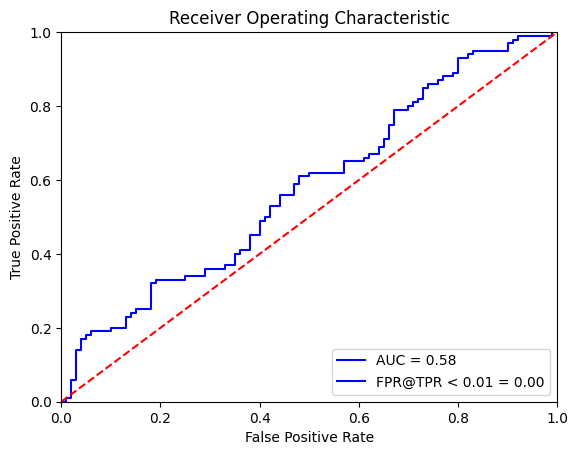

600
0.04


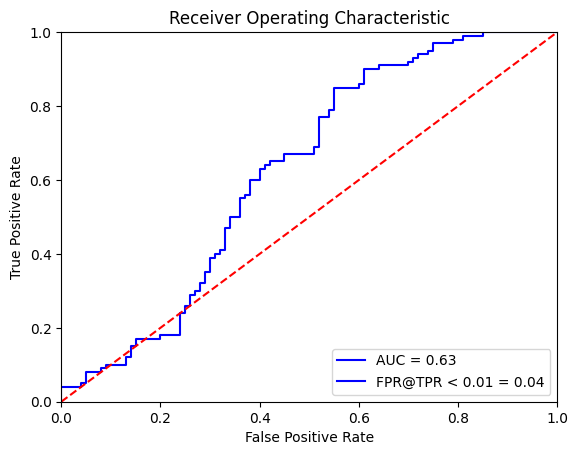

800
0.01


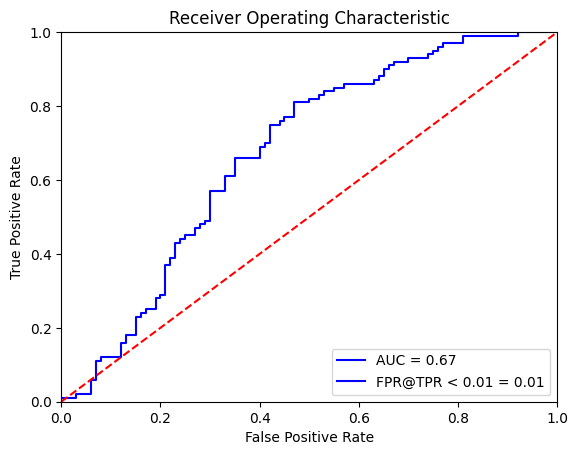

In [13]:
for i in [10,20,30,50,75,100,200,400,600,800]:
  print(i)
  roc_graph(i, df)